In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.modelling_utils as utils
import source.models_classification as modl

import numpy as np
import pandas as pd
# Example


Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


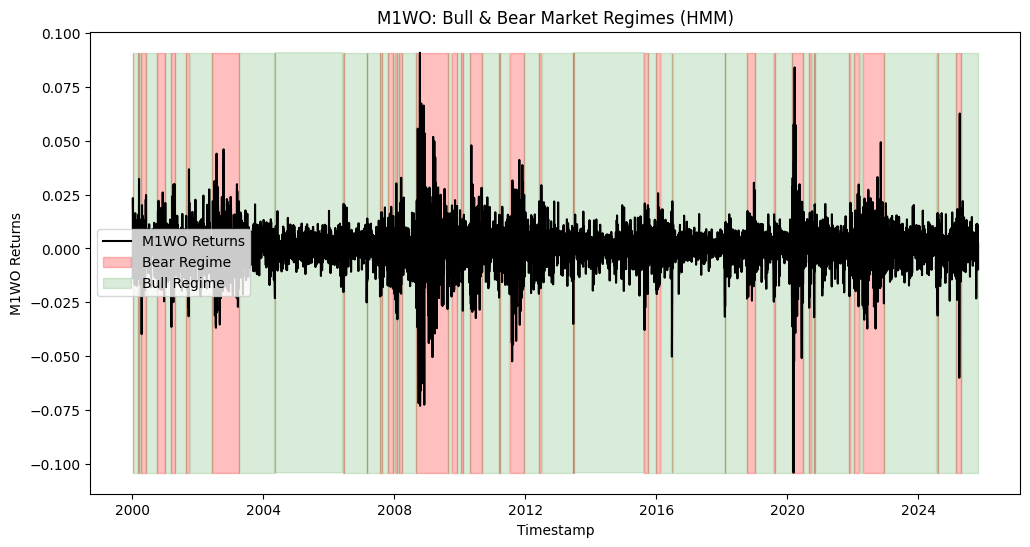

In [2]:
df = dp.create_classification_data()

In [ ]:
# def downsample_to_monthly(df):
#     df = df.copy()
#     df.index = pd.to_datetime(df.timestamp)
#     # aggregate to monthly start frequency
#     df = df.sort_index().asfreq("MS")
#     return df  
# df = downsample_to_monthly(df)

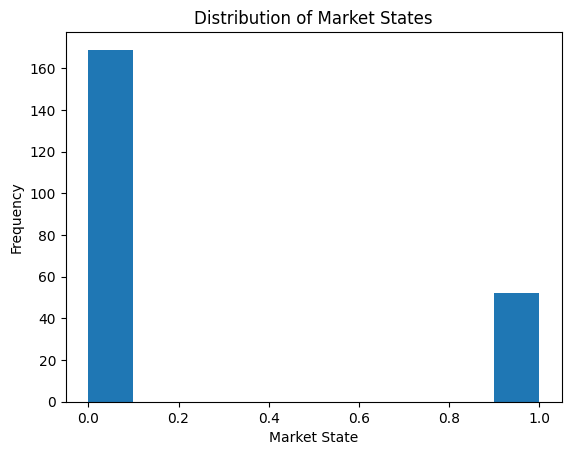

Portion of state 0: 54.69%
Portion of state 1: 16.83%


In [4]:
import matplotlib.pyplot as plt

plt.hist(df['state'])
plt.title('Distribution of Market States')
plt.xlabel('Market State')
plt.ylabel('Frequency')
plt.show()

# pretty unbalanced 
portion_state_0 = len(df[df['state'] == 0]) / len(df)
portion_state_1 = len(df[df['state'] == 1]) / len(df)
print(f"Portion of state 0: {portion_state_0:.2%}")
print(f"Portion of state 1: {portion_state_1:.2%}")

In [5]:
df.columns

Index(['timestamp', 'CL1', 'M1WO', 'SXXT', 'SPX', 'NKY', 'SPTR', 'EUR003M',
       'FEDL01', 'GC1', 'V2X', 'MOVE', 'VIX', 'USYC2Y10', 'VXJ', 'state',
       'regime'],
      dtype='object')

In [ ]:
logit_lag_fit_predict = modl.make_logit_multifeature_lag_fit_predict_fn()

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    model_fit_predict_fn=logit_lag_fit_predict,
    start_oos="2024-01-01",
)

print(metrics)

2025-01-01 00:00:00
2025-04-01 00:00:00
2025-05-01 00:00:00
2025-07-01 00:00:00
2025-08-01 00:00:00
2025-09-01 00:00:00
2025-10-01 00:00:00
[Logit-lag-baseline] Valid obs=7 | Acc=0.8571 (baseline=0.8571) | BalAcc=0.5000 (baseline=0.5000) | Skill_Acc=0.0000
{'acc': 0.8571428571428571, 'bal_acc': 0.5, 'acc_baseline': 0.8571428571428571, 'bal_acc_baseline': 0.5, 'skill_acc': 0.0}


In [7]:
from importlib import reload
reload(modl)

<module 'source.models_classification' from '/Users/kilianrunnwerth/Masterarbeit/source/models_classification.py'>

In [8]:
acc, brier, y_t, y_prob, thr_arr, dts = modl.moment_cls_oos(
    data=df,
    feature_cols=["SXXT", "SPX", "NKY", "SPTR", "EUR003M",
             "FEDL01", "GC1", "V2X", "MOVE", "VIX",
             "USYC2Y10", "VXJ"],
    target_col="state",   # your Bull/Bear label
    train_first_step_only=True,
    seq_len=8,
    start_oos="2024-01-01",
)

[MOMENT-CLS] device=mps


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
metrics_tabpfn, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn = modl.tabpfn_cls_oos(
    data=df,
    base_cols=["VIX", "USYC2Y10"],  # predictors you want to lag
    target_col="state",             # Bull/Bear label
    start_oos="2024-01-01",
    start_date="2000-01-05",
    n_lags=3,
    min_train=120,
    baseline_mode="majority",    # compare to majority baseline
    model_params="2.5",             # or None for V2 default
    quiet=False,
    model_name="TabPFN state classifier",
)

print(metrics_tabpfn)


2025-01-01 00:00:00
2025-01-02 00:00:00
2025-01-03 00:00:00
2025-01-06 00:00:00
2025-01-07 00:00:00
2025-01-08 00:00:00
2025-01-09 00:00:00
2025-01-10 00:00:00
2025-01-13 00:00:00
2025-01-14 00:00:00
2025-01-15 00:00:00
2025-01-16 00:00:00
2025-01-17 00:00:00
2025-01-20 00:00:00
2025-01-21 00:00:00
2025-01-22 00:00:00
2025-01-23 00:00:00
2025-01-24 00:00:00
2025-01-27 00:00:00
2025-01-28 00:00:00
2025-01-29 00:00:00
2025-01-30 00:00:00
2025-01-31 00:00:00
2025-02-03 00:00:00
2025-02-04 00:00:00
2025-02-05 00:00:00
2025-02-06 00:00:00
2025-02-07 00:00:00
2025-02-10 00:00:00
2025-02-11 00:00:00
2025-02-12 00:00:00
2025-02-13 00:00:00
2025-02-14 00:00:00
2025-02-17 00:00:00
2025-02-18 00:00:00
2025-02-19 00:00:00
2025-02-20 00:00:00
2025-02-21 00:00:00
2025-02-24 00:00:00
2025-02-25 00:00:00
2025-02-26 00:00:00
2025-02-27 00:00:00
2025-02-28 00:00:00
2025-03-03 00:00:00
2025-03-04 00:00:00
2025-03-05 00:00:00
2025-03-06 00:00:00
2025-03-07 00:00:00
2025-03-10 00:00:00
2025-03-11 00:00:00
